In [51]:
import pywt
import matplotlib.pyplot as plt
import random

# Investigating Wavelet Functions

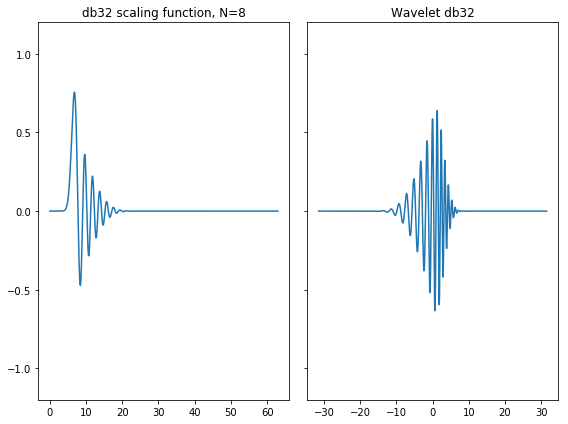

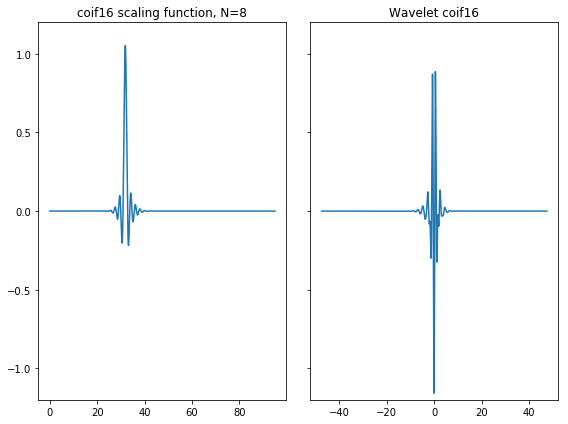

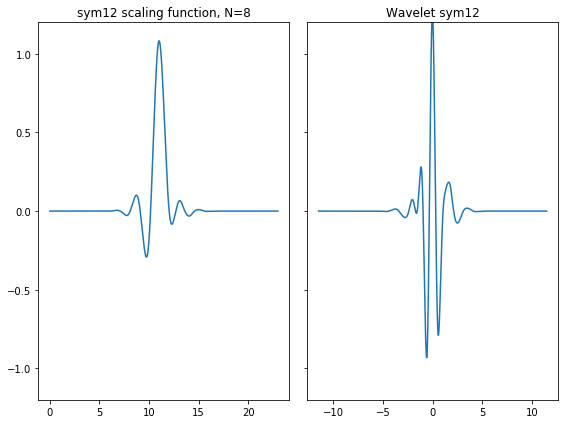

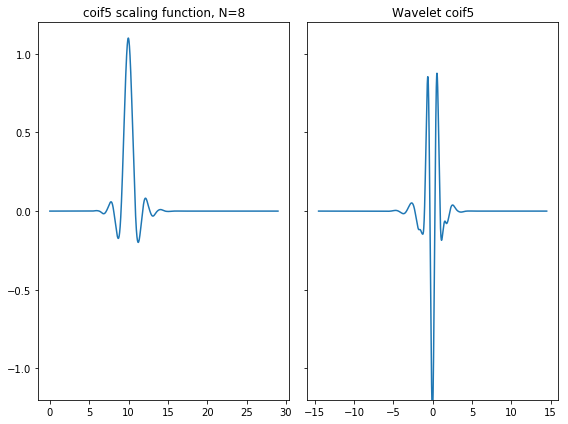

In [60]:
def plot(wavelet_name):
    db8 = pywt.Wavelet(wavelet_name)
    scaling, wavelet, x = db8.wavefun()

    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8,6))
    ax1, ax2 = axes

    ax1.plot(x, scaling);
    ax1.set_title(wavelet_name + ' scaling function, N=8');
    ax1.set_ylim(-1.2, 1.2);

    ax2.set_title('Wavelet ' + wavelet_name);
    ax2.tick_params(labelleft=False);
    ax2.plot(x-x.mean(), wavelet);

    fig.tight_layout()
    plt.show()

wavefns = []
for wavefn in random.sample(pywt.wavelist(kind='discrete'), 5):
    try:
        plot(wavefn)
    except:
        pass
    finally:
        wavefns.append(wavefn)

# Reconstructing Inputs

db32


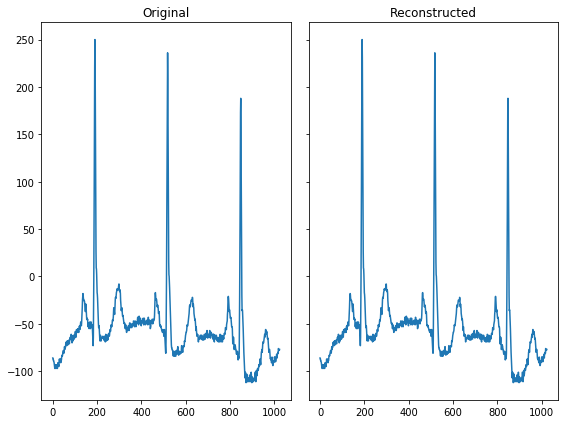

coif16


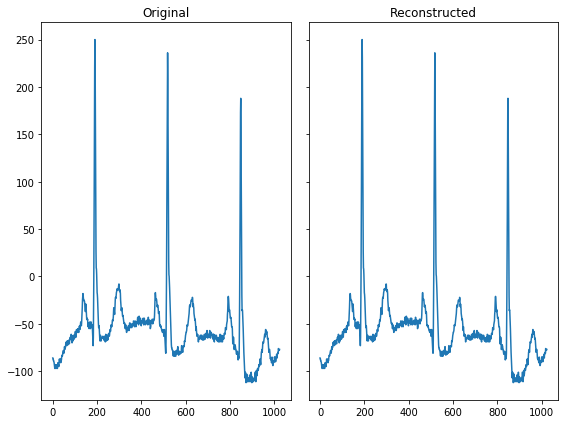

rbio6.8


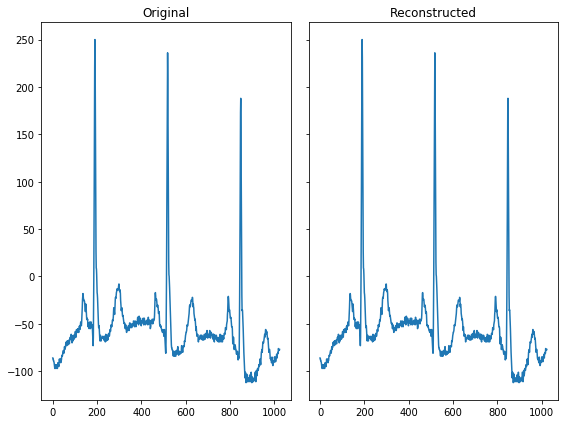

sym12


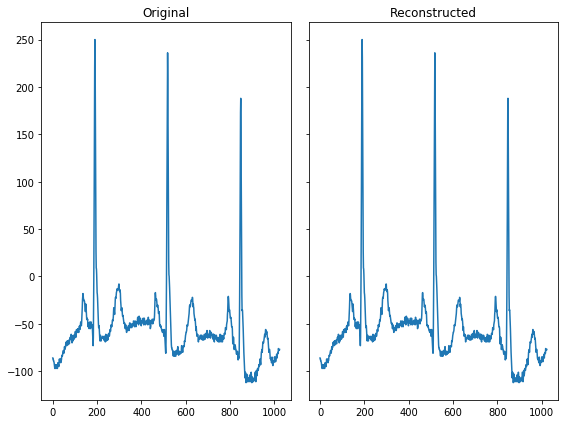

coif5


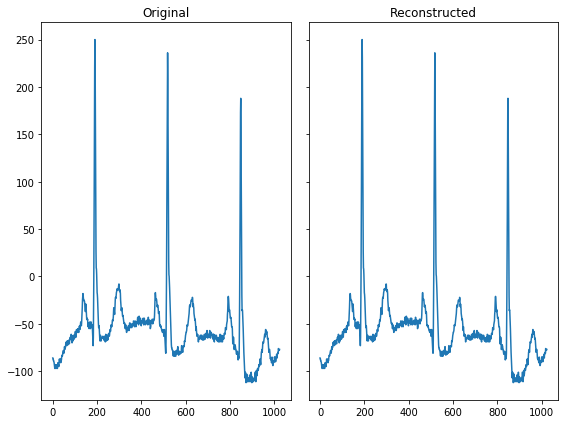

In [63]:
def plot_original_reconstructed(original, reconstructed):
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8,6))
    ax1, ax2 = axes

    ax1.plot(original);
    ax1.set_title('Original');
    
    ax2.set_title('Reconstructed');
    ax2.plot(reconstructed);

    fig.tight_layout()
    plt.show()

def reconstruct_with_wave_fn(original, wave_name):
    cA, cD = pywt.dwt(ecg, wave_name)
    reconstructed = pywt.idwt(cA, cD, wave_name)
    return reconstructed

for wavefn in wavefns:
    original = pywt.data.ecg()
    reconstructed = reconstruct_with_wave_fn(original, wavefn)
    print(wavefn)
    plot_original_reconstructed(original, reconstructed)